
# Lake Chadington Bioaccumulation Assignment

Welcome to **Lake Chadington** — a small, seemingly peaceful lake in the town of **Symonstown**.

You will use **Python in Google Colab** to explore how a pollutant moves through an aquatic food web and how it **bioaccumulates** within organisms and **biomagnifies** up the food chain.

Our simplified food web includes:

- **Periphyton** – algae and microbes attached to rocks and plants (primary producers)  
- **Crayfish** – primary consumers that graze on periphyton  
- **Smallmouth bass** – predators that eat crayfish  


>**Important:** You will record written answers in a separate worksheet.  
> Use this notebook for **data, graphs, and calculations**.



---
## Setup



In [ ]:
# --- Setup: run this cell first ---

import hashlib
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def seed_from_code(code: str) -> int:
    h = hashlib.sha256(code.encode("utf-8")).digest()
    return int.from_bytes(h[:8], "big")



def simulate_individual(seed: int, months: int = 30):
    rng = np.random.default_rng(seed)

    # ---------- STORAGE ----------
    data = {
        "Month": [],
        "Cray_Tox": [], "Cray_Energy": [],
        "Bass_Tox": [], "Bass_Energy": [],
    }

    # ---------- INITIAL VALUES ----------
    peri_tox = 2.0
    peri_energy = 5.0

    cray_tox = 5.0
    cray_energy = 10.0

    bass_tox = 2.0
    bass_energy = 25.0

    # ---------- PARAMETERS ----------
    # toxin transfer percentages
    cray_uptake = 0.12
    bass_uptake = 0.10

    # energy dynamics
    cray_energy_gain = 1.1
    bass_energy_gain = 0.9

    cray_metab = 0.25
    bass_metab = 0.35

    # randomness scales
    tox_noise = 0.20
    energy_noise = 0.4

    # ---------- LOOP ----------
    for m in range(months + 1):
        # record
        data["Month"].append(m)

        data["Cray_Tox"].append(cray_tox)
        data["Cray_Energy"].append(cray_energy)

        data["Bass_Tox"].append(bass_tox)
        data["Bass_Energy"].append(bass_energy)

        if m == months:
            break

        # --- UPDATE TOXICITY ---
        cray_tox += cray_uptake * peri_tox + rng.normal(0, tox_noise)
        bass_tox += bass_uptake * cray_tox + rng.normal(0, tox_noise)

        cray_tox = max(cray_tox, 0.05)
        bass_tox = max(bass_tox, 0.05)

        # --- UPDATE ENERGY ---
        cray_energy += cray_energy_gain - cray_metab + rng.normal(0, energy_noise)
        bass_energy += bass_energy_gain - bass_metab + rng.normal(0, energy_noise)

        cray_energy = max(cray_energy, 1.0)
        bass_energy = max(bass_energy, 1.0)

    return pd.DataFrame(data)


print("Section 1 Setup complete!")

Section 1 Setup complete!


In [ ]:

# --- Group Code and simulation settings ---

GROUP_CODE = "Group_1"   # <-- change this to your RP Group Number
SEED_BASE = seed_from_code(GROUP_CODE)



---
## Section 1: Individual Dynamics


In [ ]:
# --- Generate data ----

MONTHS_INDIVIDUAL = 12   # months for individual crayfish / bass

fish_df = simulate_individual(seed=SEED_BASE, months=MONTHS_INDIVIDUAL)
fish_df


,Month,Cray_Tox,Cray_Energy,Bass_Tox,Bass_Energy
0,0,5.000000,10.000000,2.000000,25.000000
1,1,5.332267,11.151906,2.574567,25.194991
2,2,5.878223,13.022404,3.002050,26.242614
3,3,6.061841,13.465075,3.718509,27.090293
4,4,6.573971,14.655436,3.744074,27.478845
5,5,6.730072,15.153378,4.489856,27.881076
6,6,7.081688,15.768402,5.383853,28.706242
7,7,7.145554,16.779333,5.809659,29.191817
8,8,7.523188,17.671093,6.592101,30.124078
9,9,7.759797,18.550687,7.324954,30.311254



### STEP 1: Plot data from a crayfish

Then fill out
**Q1 - Q3**


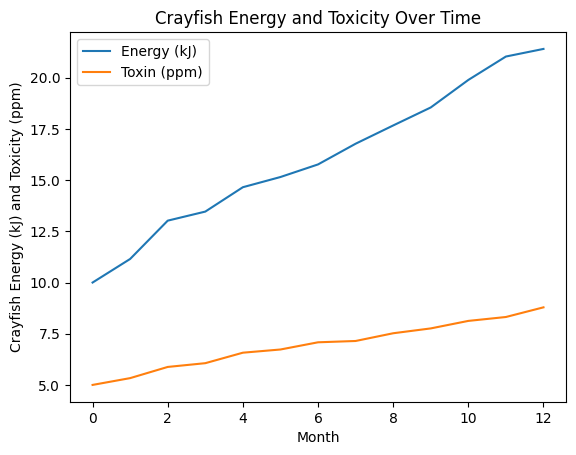

In [ ]:
# --- Crayfish graph: Month vs Energy and Toxicity ---

plt.figure()

plt.plot(fish_df["Month"], fish_df["Cray_Energy"], label="Energy (kJ)")
plt.plot(fish_df["Month"], fish_df["Cray_Tox"],    label="Toxin (ppm)")

# -- Use the below code for your labels ---

plt.xlabel("Month")
plt.ylabel("Crayfish Energy (kJ) and Toxicity (ppm)")
plt.title("Crayfish Energy and Toxicity Over Time")
plt.legend()

plt.show()




### STEP 2: Plot data from a smallmouth bass
Answer
**Q4**


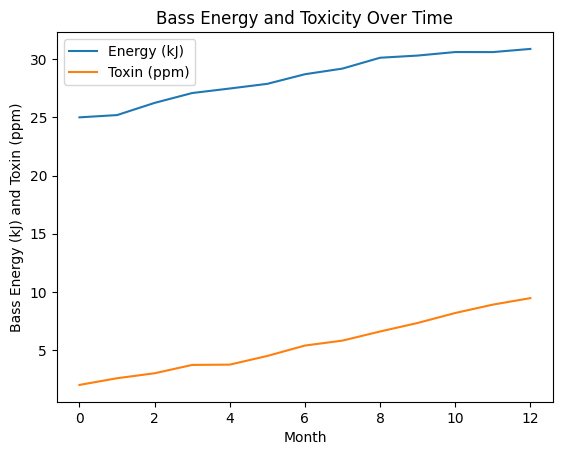

In [ ]:
# --- Bass graph: Month vs Energy and Toxicity ---

plt.figure()
plt.plot(fish_df["Month"], fish_df["Bass_Energy"], label="Energy (kJ)")
plt.plot(fish_df["Month"], fish_df["Bass_Tox"],    label="Toxin (ppm)")


plt.ylabel("Bass Energy (kJ) and Toxin (ppm)")
plt.xlabel("Month")
plt.title("Bass Energy and Toxicity Over Time")
plt.legend()



---
##Section 2 – Community Dynamics




In [ ]:

# --- Setup: run this cell to setup the situations---

def simulate_scenario(seed: int, months: int, scenario_id: int) -> pd.DataFrame:
    rng = np.random.default_rng(seed)

    data = {
        "Month": [],
        "Peri_Tox": [], "Peri_Energy": [],
        "Cray_Tox": [], "Cray_Energy": [],
        "Bass_Tox": [], "Bass_Energy": [],
    }

    per_tox = 2.0
    cray_tox = 2.0
    bass_tox = 2.0

    per_energy = 5.0
    cray_energy = 10.0
    bass_energy = 25.0

    for m in range(months + 1):
        # record current state
        data["Month"].append(m)
        data["Peri_Tox"].append(per_tox)
        data["Peri_Energy"].append(per_energy)
        data["Cray_Tox"].append(cray_tox)
        data["Cray_Energy"].append(cray_energy)
        data["Bass_Tox"].append(bass_tox)
        data["Bass_Energy"].append(bass_energy)

        if m == months:
            break

        if scenario_id == 0:
            if m < 2:
                spike = 25.0
            elif m < 4:
                spike = 15.0
            elif m < 6:
                spike = 7.0
            else:
                spike = 0.0

            target_per_tox = 2.0 + spike
            energy_trend = +0.25

            per_relax = 0.55
            per_noise = 0.20

            cray_uptake = 0.55
            cray_extra  = 0.15

            bass_uptake = 0.40
            bass_extra  = 0.12

        elif scenario_id == 1:
            target_per_tox = 2.0 + 0.25 * m
            energy_trend = +0.12

            per_relax = 0.50
            per_noise = 0.06

            cray_uptake = 0.40
            cray_extra  = 0.10

            bass_uptake = 0.18
            bass_extra  = 0.05

        else:
            target_per_tox = 3.0 + rng.normal(0.0, 0.2)
            energy_trend = -0.25

            per_relax = 0.40
            per_noise = 0.10

            cray_uptake = 0.18
            cray_extra  = 0.12

            bass_uptake = 0.15
            bass_extra  = 0.08


        per_tox += per_relax * (target_per_tox - per_tox) + rng.normal(0.0, per_noise)
        per_tox = max(per_tox, 0.1)

        per_energy += energy_trend + rng.normal(0.0, 0.20)
        if scenario_id == 2:
            per_energy = min(max(per_energy, 1.5), 7.0)
        else:
            per_energy = min(max(per_energy, 3.0), 12.0)


        cray_tox += cray_uptake * per_tox + cray_extra + rng.normal(0.0, 0.35)
        cray_tox = max(cray_tox, 0.2)

        if scenario_id == 2:
            cray_energy += -0.50 + rng.normal(0.0, 0.30)
        else:
            cray_energy += 0.60 + rng.normal(0.0, 0.30)

        cray_energy = min(max(cray_energy, 4.0), 25.0)


        bass_tox += bass_uptake * cray_tox + bass_extra + rng.normal(0.0, 0.40)
        bass_tox = max(bass_tox, 0.2)

        if scenario_id == 2:
            bass_energy += -0.35 + rng.normal(0.0, 0.35)
        else:
            bass_energy += 0.70 + rng.normal(0.0, 0.35)

        bass_energy = min(max(bass_energy, 15.0), 40.0)

    return pd.DataFrame(data)




### STEP 3: Set scenario ID and generate data



In [ ]:
# Change this to 0, 1, or 2 for your RP Group (refer to Assignment doc)
SCENARIO_ID = 0


In [ ]:
# --- Run Scenario Simulation ---

MONTHS_SCENARIO = 12   # run for 12 months

community_df = simulate_scenario(
    seed=SEED_BASE,          # from your group code cell
    months=MONTHS_SCENARIO,
    scenario_id=SCENARIO_ID
)

community_df

,Month,Peri_Tox,Peri_Energy,Cray_Tox,Cray_Energy,Bass_Tox,Bass_Energy
0,0,2.000000,5.000000,2.000000,10.000000,2.000000,25.000000
1,1,15.842267,5.291340,11.127415,10.333744,7.182878,25.419407
2,2,22.489269,5.790152,23.547844,11.099156,16.314687,26.379875
3,3,19.742301,5.408319,34.853926,11.578070,30.208460,27.207232
4,4,18.058006,5.584435,45.131156,12.456812,48.145947,28.148002
5,5,12.899969,5.545685,52.516954,13.008493,69.547996,28.900719
6,6,10.775866,5.986815,58.587746,13.543803,93.132688,29.283248
7,7,6.075881,6.281371,62.511334,13.957667,118.158293,29.787643
8,8,3.980851,6.254731,65.256618,14.077794,143.902469,30.244623
9,9,2.768693,6.298770,66.849865,14.845782,170.888180,30.673971



### STEP 4: Toxicity/Energy graph


Next, we calculate **Tox/Energy** for each species and add those olumns to the dataframe

Answer **Q5**


In [ ]:
# --- Compute Tox/Energy (T/E) for each species ---

#FILL THIS OUT YOURSELVES!

# The example below shows how to calculate T/E for Periphyton.
# Repeat this same calculation for Crayfish and for Smallmouth Bass
# by creating: "Cray_ToxPerEnergy" and "Bass_ToxPerEnergy".

community_df["Peri_ToxPerEnergy"] = community_df["Peri_Tox"] / community_df["Peri_Energy"]
community_df["Cray_ToxPerEnergy"] = community_df["Cray_Tox"] / community_df["Cray_Energy"]
community_df["Bass_ToxPerEnergy"] = community_df["Bass_Tox"] / community_df["Bass_Energy"]

# Display the Periphyton T/E values
#(you will also display Crayfish and Bass T/E after computing them)
community_df[["Month", "Peri_ToxPerEnergy", "Cray_ToxPerEnergy", "Bass_ToxPerEnergy"]]



,Month,Peri_ToxPerEnergy,Cray_ToxPerEnergy,Bass_ToxPerEnergy
0,0,0.400000,0.200000,0.080000
1,1,2.993999,1.076804,0.282575
2,2,3.884055,2.121589,0.618452
3,3,3.650358,3.010340,1.110310
4,4,3.233632,3.623010,1.710457
5,5,2.326127,4.037128,2.406445
6,6,1.799933,4.325797,3.180408
7,7,0.967286,4.478638,3.966688
8,8,0.636454,4.635429,4.757952
9,9,0.439561,4.502954,5.571114


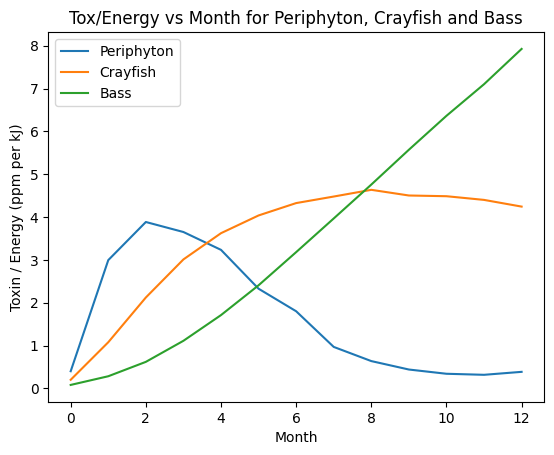

In [ ]:

# --- Plot Tox/Energy vs Month for Periphyton, Crayfish, Bass ---

plt.figure()

plt.plot(community_df["Month"], community_df["Peri_ToxPerEnergy"], label="Periphyton")
plt.plot(community_df["Month"], community_df["Cray_ToxPerEnergy"], label="Crayfish")
plt.plot(community_df["Month"], community_df["Bass_ToxPerEnergy"], label="Bass")

plt.xlabel("Month")
plt.ylabel("Toxin / Energy (ppm per kJ)")
plt.title("Tox/Energy vs Month for Periphyton, Crayfish and Bass")
plt.legend()
plt.show()



### STEP 5: BAF and BMF



---

#### 1. BAF – Bioaccumulation Factor

BAF tells us **how contaminated an organism is compared with the surrounding environment**.

  - `BAF_cray`  = (crayfish T/E at final month) ÷ `C_enviro`
  - `BAF_bass`  = (bass T/E at final month) ÷ `C_enviro`

---

#### 2. BMF – Biomagnification Factor

BMF tells us **how much toxin is magnified from one trophic level to the next**.

We again use **toxin-per-energy (T/E)** at the **final month**, but this time we compare each predator directly to its prey:


biomagnification from periphyton → crayfish  
- `BMF_cray` = (crayfish T/E at final month) ÷ (periphyton T/E at final month)  
  
biomagnification from crayfish → bass  
- `BMF_bass` = (bass T/E at final month) ÷ (crayfish T/E at final month)




---

**Fill out Q6 - Q7**

In [ ]:
# --- BAF and BMF calculations ---

# Final month in the community dataframe
final_month = community_df["Month"].max()
print("Final month:", final_month)

# C_enviro = mean periphyton tox/energy
C_enviro = community_df["Peri_ToxPerEnergy"].mean()
print("C_enviro (mean periphyton tox/energy):", C_enviro)

# Row corresponding to the final month
row_final = community_df.loc[community_df["Month"] == final_month].iloc[0]

# Tox/Energy values at final month
peri_final_TE = row_final["Peri_ToxPerEnergy"]
cray_final_TE = row_final["Cray_ToxPerEnergy"]
bass_final_TE = row_final["Bass_ToxPerEnergy"]


print("C_enviro (mean periphyton T/E):", C_enviro)
print("Periphyton T/E at final month:", peri_final_TE)
print("Crayfish T/E at final month:", cray_final_TE)
print("Bass T/E at final month:", bass_final_TE)

Final month: 12
C_enviro (mean periphyton tox/energy): 1.6440976638725866
C_enviro (mean periphyton T/E): 1.6440976638725866
Periphyton T/E at final month: 0.38526555457207123
Crayfish T/E at final month: 4.24369914846911
Bass T/E at final month: 7.925351102243692


In [ ]:
#FILL THIS OUT YOURSELVES!
#Use the variables and equations from above

# CALCULATE BAF and print results for:

#crayfish
BAF_cray = cray_final_TE / C_enviro
print(f"BAF Crayfish: {BAF_cray}")

#bass
BAF_bass = bass_final_TE / C_enviro
print(f"BAF Bass: {BAF_bass}")

# CALCULATE BMF and print results for:

# crayfish vs periphyton
BMF_cray = cray_final_TE / peri_final_TE
print(f"BMF Cray: {BMF_cray}")

# bass vs crayfish
BMF_bass = bass_final_TE / cray_final_TE
print(f"BMF Bass: {BMF_bass}")


BAF Crayfish: 2.5811721783445014
BAF Bass: 4.820486809509807
BMF Cray: 11.014997572733291
BMF Bass: 1.8675572478088405



### STEP 6: Use Clues to Deduce the Situation

**Answer Q8**


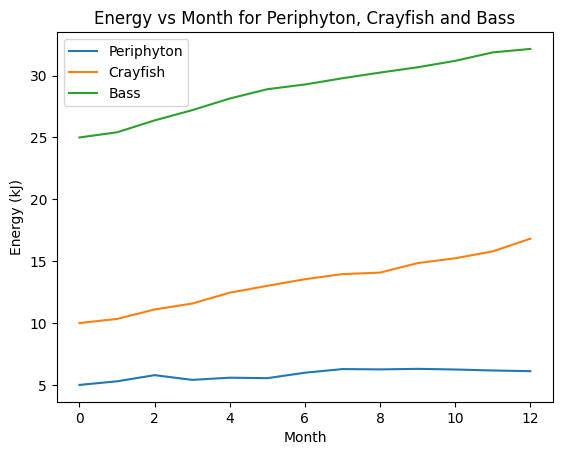

In [ ]:

# --- Plot Energy vs Month for Periphyton, Crayfish, Bass ---

plt.figure()

plt.plot(community_df["Month"], community_df["Peri_Energy"], label="Periphyton")
plt.plot(community_df["Month"], community_df["Cray_Energy"], label="Crayfish")
plt.plot(community_df["Month"], community_df["Bass_Energy"], label="Bass")

plt.xlabel("Month")
plt.ylabel("Energy (kJ)")
plt.title("Energy vs Month for Periphyton, Crayfish and Bass")
plt.legend()
plt.show()

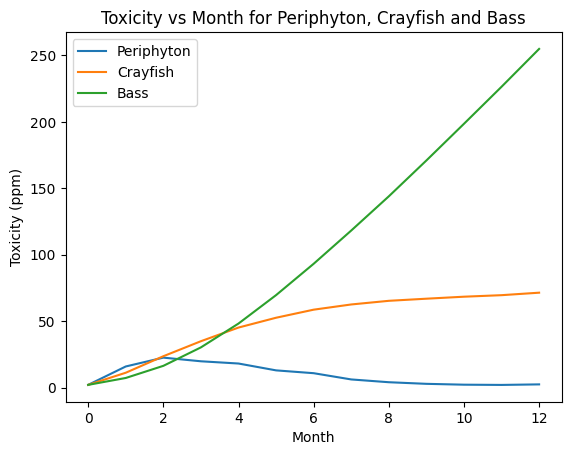

In [ ]:

# --- Plot Toxicity vs Month for Periphyton, Crayfish, Bass ---

plt.figure()

plt.plot(community_df["Month"], community_df["Peri_Tox"], label="Periphyton")
plt.plot(community_df["Month"], community_df["Cray_Tox"], label="Crayfish")
plt.plot(community_df["Month"], community_df["Bass_Tox"], label="Bass")

plt.xlabel("Month")
plt.ylabel("Toxicity (ppm)")
plt.title("Toxicity vs Month for Periphyton, Crayfish and Bass")
plt.legend()
plt.show()


### STEP 7: Extension Questions

**Answer Q9 - Q10**



# Remeber to submit your saved .ipynb file and the document with all your answers to A2L